# unsupervised learning soal nomor 1
## Nama: Mochamad Dani Hartanto
## Nim: 170411100090
## Kelas: DSI UTM

In [64]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
df = read_csv("../dataset.csv",index_col=0)

In [66]:
df.head()

,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX
CYT,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, ADT1_YEAST to G6PD_YEAST
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NUC     1484 non-null   float64
 1   MIT     1484 non-null   float64
 2   ME3     1484 non-null   float64
 3   ME2     1484 non-null   float64
 4   ME1     1484 non-null   float64
 5   EXC     1484 non-null   float64
 6   VAC     1484 non-null   float64
 7   POX     1484 non-null   float64
dtypes: float64(8)
memory usage: 104.3+ KB


In [68]:
np.sum(df.isnull())

NUC    0
MIT    0
ME3    0
ME2    0
ME1    0
EXC    0
VAC    0
POX    0
dtype: int64

data tidak ada yg null

# melakukan praproses pada dataset

In [82]:
minmax_form = preprocessing.MinMaxScaler(feature_range = (0,10))
normalized_data = minmax_form.fit_transform(df)

normalized_data

array([[ 5.28089888,  5.51724138,  3.29113924, ...,  6.57534247,
         2.2       ,  4.44444444],
       [ 3.59550562,  6.20689655,  3.41772152, ...,  7.26027397,
         2.2       , 10.        ],
       [ 5.95505618,  5.63218391,  3.5443038 , ...,  7.26027397,
         2.2       ,  4.44444444],
       ...,
       [ 6.29213483,  5.05747126,  1.89873418, ...,  7.67123288,
         2.2       ,  4.44444444],
       [ 3.59550562,  3.10344828,  4.93670886, ...,  7.26027397,
         3.9       ,  3.33333333],
       [ 6.06741573,  4.71264368,  4.17721519, ...,  7.26027397,
         2.2       ,  4.44444444]])

In [70]:
#dataLatih dengan algoritma K-means
#belumDiNormalisasi

sum_of_squared_distances = {}
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    model = KMeans(n_clusters = n_cluster,
                  init = 'random',
                  n_init = 10,
                  random_state = 0)
    
    # proses training
    model.fit(df)
    
    sum_of_squared_distances[n_cluster] = model.inertia_

In [71]:
sum_of_squared_distances

{1: 123.4778340296498,
 2: 95.83129556833934,
 3: 80.64452683333252,
 4: 71.31498742232736,
 5: 64.14364255389573,
 6: 60.40054165506869,
 7: 57.91587542357355,
 8: 50.02452490011954,
 9: 47.894355666344545,
 10: 45.789765097151374}

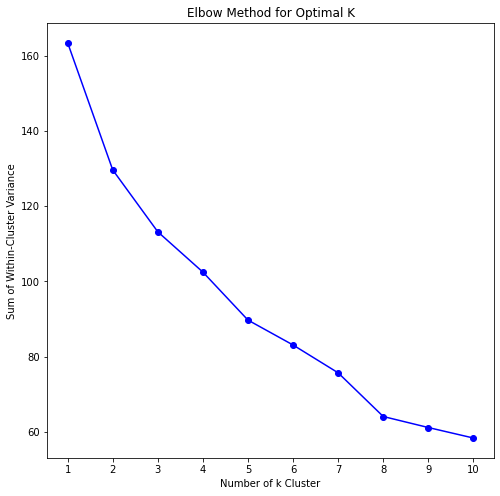

In [83]:
#menggunakan chart elbow
plt.figure(figsize = (8,8))

plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of k Cluster")
plt.ylabel("Sum of Within-Cluster Variance")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sum_of_squared_distances.values(),
        '-o', color = "Blue")

plt.show()

In [73]:
#dataSetelahDiNormalisasi

sum_of_squared_distances = {}
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    model = KMeans(n_clusters = n_cluster,
                  init = 'random',
                  n_init = 10,
                  random_state = 0)
    
    # proses training
    model.fit(normalized_data)
    
    sum_of_squared_distances[n_cluster] = model.inertia_

In [74]:
sum_of_squared_distances

{1: 163.41895538092666,
 2: 129.61676654256522,
 3: 113.15954017154785,
 4: 102.4540973872218,
 5: 89.69693918310938,
 6: 83.08009461317853,
 7: 75.6806723631883,
 8: 64.07604764413192,
 9: 61.14615179706965,
 10: 58.355531530539054}

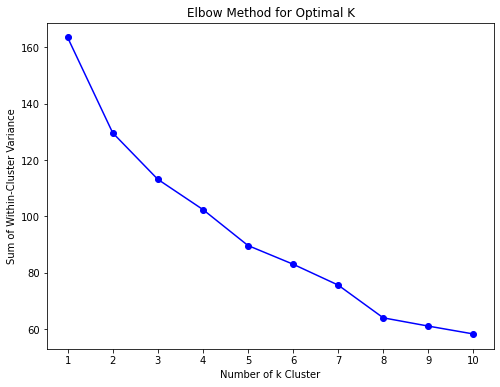

In [75]:
#visualkan chart dengan elbow lagi
plt.figure(figsize = (8,6))

plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of k Cluster")
plt.ylabel("Sum of Within-Cluster Variance")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sum_of_squared_distances.values(),
        '-o', color = "Blue")

plt.show()

# selanjutnya di evaluasi dengan silhouette score

In [86]:
#data sudah dinormalisasi
sil = {}
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters = n_cluster,
                      init = 'random',
                      n_init = 10,
                      random_state = 0)
    
    preds = clusterer.fit_predict(normalized_data)
    score = silhouette_score(df, preds, metric = "euclidean")
    
    sil[n_cluster] = score

In [87]:
for n_cluster, sil_score in sil.items():
    print(n_cluster, ":", sil_score)

2 : 0.639897221203431
3 : 0.4084559896262268
4 : 0.44429572790923166
5 : 0.3293731452148195
6 : 0.6094579550459571
7 : 0.6316261254136981
8 : 0.7270639878811962
9 : 0.7514150688192792
10 : 0.6540214570339792


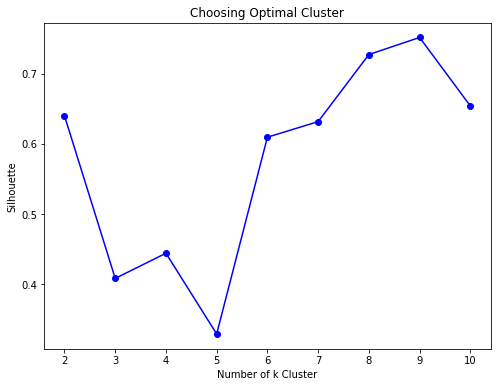

In [88]:
#visualkan data lagi
plt.figure(figsize = (8,6))

plt.title("Choosing Optimal Cluster")
plt.xlabel("Number of k Cluster")
plt.ylabel("Silhouette")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sil.values(),
        '-o', color = "Blue")

plt.show()

In [89]:
#data yang belom dinormalisasi
sil = {}
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters = n_cluster,
                      init = 'random',
                      n_init = 10,
                      random_state = 0)
    
    preds = clusterer.fit_predict(df)
    score = silhouette_score(df, preds, metric = "euclidean")
    
    sil[n_cluster] = score

In [90]:
for n_cluster, sil_score in sil.items():
    print(n_cluster, ":", sil_score)

2 : 0.639897221203431
3 : 0.6757314143017931
4 : 0.6580173674914382
5 : 0.6669004545176055
6 : 0.6449251099951853
7 : 0.703835585579227
8 : 0.7188472042710328
9 : 0.6467584014631965
10 : 0.6255727628787432


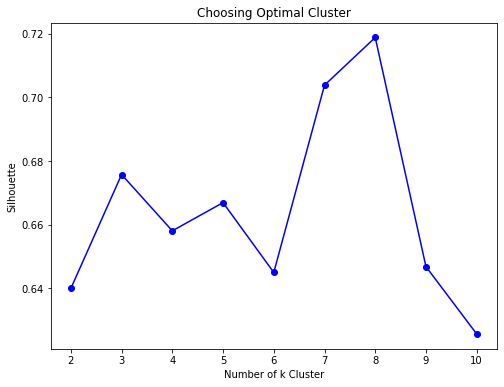

In [91]:
plt.figure(figsize = (8,6))

plt.title("Choosing Optimal Cluster")
plt.xlabel("Number of k Cluster")
plt.ylabel("Silhouette")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sil.values(),
        '-o', color = "Blue")

plt.show()

# tahap clustering setelah data melewati praproses

In [98]:
kmins = KMeans(n_clusters = 5, 
              init = 'random',
              n_init = 10,
              random_state = 0)

kmins.fit(df)
y_kmins = kmins.predict(df)

In [99]:
kmins_df = pd.DataFrame(y_kmins, columns = ['cluster'])
kmins_df

,cluster
0,4
1,4
2,4
3,3
4,1
...,...
1479,2
1480,1
1481,4
1482,0


In [100]:
df['segmen'] = y_kmins
df

,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,segmen
CYT,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,4
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,4
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,4
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,3
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,1
...,...,...,...,...,...,...,...,...,...
YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,2
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,1
ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,4


<AxesSubplot:>

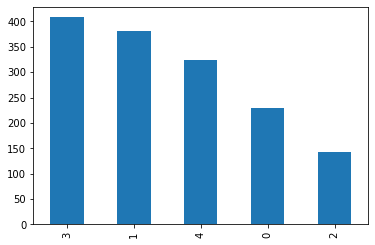

In [101]:
df['segmen'].value_counts().plot(kind = 'bar')

In [102]:
df

,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,segmen
CYT,,,,,,,,,
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,4
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,4
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,4
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,3
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,1
...,...,...,...,...,...,...,...,...,...
YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,2
ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,1
ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,4


In [103]:
df.to_csv (r'export_dataframe2.csv', index = False, header=True)